1. How would you incorporate other vectorizations than tf-idf into your proposed document similarity measure (Question 3 of Week 2)?

    When creating a term-document matrix, we can leverage other values to represent the embeddings such as frequency of words instead of tf-idf but it won't work as well. Another way would be to embedd the documents themsleves instead of the words and calculate the cosine similarity of the vectors. This could be done by first embedding the words using sparse or dense models and then aggregating to embed the documents.    


2. How could one make use these other vectorizations to improve sentiment analysis by considering longer sequences within the text just than single words?

    
    When leveraging dense vectorization for example, we can define a bigger context window for each word which helps in determining words that are related but not similar. This ability to group similar words will lead to better grouping of positive, negative and neutral words together and improve sentiment detection. 
    


3. Would text prediction (like the auto-completion of Question 2 of Week 6) be easier in some way if these other vectorizations are taken into consideration? How and why?

    I think the dense vectorization here could be useful when both the w (target word) & c (context) matrices here are taken into account. By combining them, we can determine for each word the most likely context word that has the highest probability of appearing next tot he target word - which could help improve predictions. Similariy, the PPMI & word by word sparse matric could be leveraged in the same way.
    
    
    

4. Compute and compare (k-means or other) clusterings (for a corpus of your choice) based on our three vectorizations — tf-idf, PPMI, and skipgram embeddings — in terms of some consistency measure such as the Rand or the Jaccard index. Discuss the differences you observe. Does the spacial grouping, in any of the three cases, appear to capture some sort of perceivable semantic similarity?

    I couldn't and didn't have time to get the last parts of this question. I was able to obtain the clustering for my tf-idf sparse matrix, but failed to make the dense matrix work. After obtianing the word vectors, I wanted to join them to the documents that contained the words and then aggregated their vectors to get the document vectors. From there, I would have PCA'd again to two dimensions and plot the cluisters to see if we get the same thing. Coneptually, one thing I was interested to find out is just how good word emebeddings would be to cluster the documents in the same way the tf-idf was capable of. 

## Code

In [1]:
# Importing the BBC News dataset
import numpy as np
import pandas as pd

df = pd.read_csv('bbc-news-data.csv', sep='\t')

# The df is split into four columns, where each row is an article. 
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [2]:
# Splitting the dataset into words 
import nltk
df["word"] = df["content"].apply(lambda x: nltk.word_tokenize(x))


In [3]:
df

,category,filename,title,content,word
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,"[Quarterly, profits, at, US, media, giant, Tim..."
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,"[The, dollar, has, hit, its, highest, level, a..."
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,"[The, owners, of, embattled, Russian, oil, gia..."
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,"[British, Airways, has, blamed, high, fuel, pr..."
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,"[Shares, in, UK, drinks, and, food, firm, Alli..."
...,...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,"[BT, is, introducing, two, initiatives, to, he..."
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,"[Computer, users, across, the, world, continue..."
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...,"[A, new, European, directive, could, put, soft..."
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...,"[The, man, making, sure, US, computer, network..."


In [4]:
#Exploding the DF by the new paragraph column instead of by text

df = df.explode("word", ignore_index=True)
df

,category,filename,title,content,word
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,Quarterly
1,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,profits
2,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,at
3,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,US
4,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,media
...,...,...,...,...,...
963058,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",was
963059,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",the
963060,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",days
963061,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",!


In [5]:
# Removing Charchters & just keeping words
df["is_alpha"] = df["word"].apply(lambda x: x.isalpha())

# Filter to only keep words
df_w = df[df['is_alpha']==True]
df_w

,category,filename,title,content,word,is_alpha
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,Quarterly,True
1,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,profits,True
2,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,at,True
3,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,US,True
4,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,media,True
...,...,...,...,...,...,...
963057,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",them,True
963058,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",was,True
963059,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",the,True
963060,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",days,True


# Clustering with the TF-IDF Sparse Matrix

In [6]:
# Obtain the TF-IDF Weights
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"])


df_raw = pd.read_csv('bbc-news-data.csv', sep='\t')
#Remove digits, we have 2224 articles
vectorizer = TfidfVectorizer(token_pattern=r"\b[^\d\W]+", stop_words = stop_words, strip_accents='ascii')
tf_idf = vectorizer.fit_transform(df_raw["content"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alrab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\alrab\anaconda3\envs\nlp_fund\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn(


In [7]:
#Saving results in a DF
df_tfidf = pd.DataFrame(tf_idf.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf = df_tfidf.reset_index(level=0)

df_tfidf_melt = pd.melt(df_tfidf, id_vars=['index'], var_name='word', value_name='tf_idf')


In [14]:
df_tfidf

,index,aa,aaa,aaas,aac,aadc,aaliyah,aaltra,aamir,aan,...,zooms,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2222,2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Clustering

In [20]:

from sklearn.cluster import KMeans

# initialize kmeans with 5 centroids
kmeans = KMeans(n_clusters=5, random_state=42)
# fit the model
kmeans.fit(tf_idf)
# store cluster labels in a variable
clusters = kmeans.labels_

In [21]:
clusters

array([1, 1, 1, ..., 4, 4, 4])

In [23]:
#PCA (Principal Component Analysis) which reduces the dimensionality of a data set to an arbitrary number while preserving most of the information contained in it.

from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(tf_idf.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [25]:
x0.size

2225

In [44]:
# Before creating our chart let’s better organize our dataframe by creating columns cluster, x0, x1
# assign clusters and pca vectors to our dataframe 
df_tfidf['cluster'] = clusters
df_tfidf['x0'] = x0
df_tfidf['x1'] = x1
df_tfidf

,index,aa,aaa,aaas,aac,aadc,aaliyah,aaltra,aamir,aan,...,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev,cluster,x0,x1
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.043103,-0.116397
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.032956,-0.097156
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.003573,-0.066787
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.008996,-0.096207
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.026026,-0.024055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,-0.021832,-0.130504
2221,2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,-0.027434,-0.137998
2222,2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.017738,-0.078392
2223,2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,-0.015798,-0.060751


In [45]:
# Let’s see which are the most relevant keywords for each centroid so that we can rename each cluster with a better label

def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(tf_idf.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
prime,tax,minister,government,howard,brown,blair,party,election,labour

Cluster 1
economic,oil,sales,bank,market,company,economy,growth,year,government

Cluster 2
star,festival,films,album,year,band,music,award,awards,film

Cluster 3
season,play,players,cup,match,team,club,win,england,game

Cluster 4
broadband,net,phone,digital,music,technology,users,software,mobile,people


Amazing, it correctly categorized my clusters into the following 5: Business, Entertainment, Politics, Sport, Tech)

In [46]:
# map clusters to appropriate labels 
cluster_map = {0: "Politics", 1: "Business", 2: "Entertainment", 3: "Sport", 4: "Tech"}
# apply mapping
df_tfidf['cluster'] = df_tfidf['cluster'].map(cluster_map)

In [47]:
df_tfidf

,index,aa,aaa,aaas,aac,aadc,aaliyah,aaltra,aamir,aan,...,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev,cluster,x0,x1
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Business,-0.043103,-0.116397
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Business,0.032956,-0.097156
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Business,0.003573,-0.066787
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Business,-0.008996,-0.096207
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Business,-0.026026,-0.024055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tech,-0.021832,-0.130504
2221,2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tech,-0.027434,-0.137998
2222,2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tech,0.017738,-0.078392
2223,2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tech,-0.015798,-0.060751


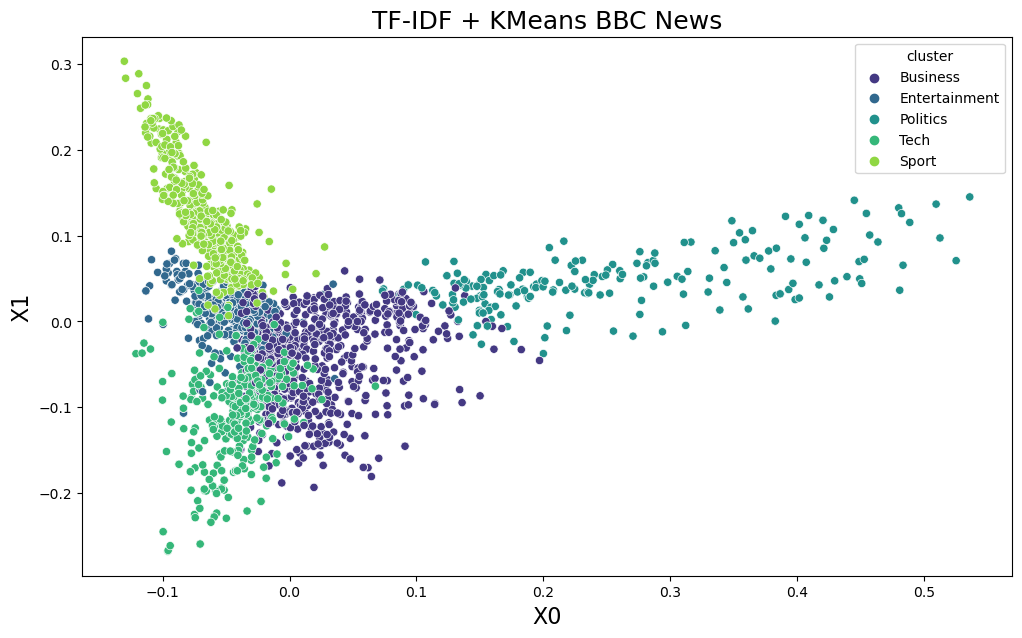

In [49]:
# Viz the clusters
# viz libs
import matplotlib.pyplot as plt
import seaborn as sns
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans BBC News", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_tfidf, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

# Clustering with skipgram embeddings

In [54]:
import re
import nltk

df_clean = df_w
df_clean["word"] = df_clean["word"].apply(lambda x: x.lower())
df_clean

C:\Users\alrab\AppData\Local\Temp\ipykernel_25212\3139767472.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["word"] = df_clean["word"].apply(lambda x: x.lower())


,category,filename,title,content,word,is_alpha
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,quarterly,True
1,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,profits,True
2,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,at,True
3,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,us,True
4,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,media,True
...,...,...,...,...,...,...
963057,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",them,True
963058,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",was,True
963059,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",the,True
963060,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",days,True


In [68]:
import numpy as np

all_words = df_clean["word"].to_numpy()
words_clean = np.unique(all_words)
print(all_words.size)
print(words_clean.size)

815293
27205


In [76]:
# Removing Stop Words
for line in stop_words:
    if line in words_clean:
        words_clean = np.delete(words_clean, np.where(words_clean == line)) 
    continue
print(words_clean)

['aa' 'aaa' 'aaas' ... 'zutons' 'zvonareva' 'zvyagintsev']


In [135]:
words_clean

array(['aa', 'aaa', 'aaas', ..., 'zutons', 'zvonareva', 'zvyagintsev'],
      dtype=object)

In [136]:
from gensim.models import Word2Vec

model = Word2Vec(words_clean, vector_size=100, min_count=1, workers=4)

In [140]:
model.similarity('zvyagintsev', 'aa')

AttributeError: 'Word2Vec' object has no attribute 'similarity'

In [141]:
print(model.wv[1])

[-0.05311512  0.03932017  0.17215875  0.22311576  0.19652353 -0.09950556
  0.1116844   0.275502   -0.17095813 -0.1062403   0.02061871 -0.1836439
 -0.03682987  0.23542662  0.08298792  0.02162882  0.09303626  0.2418773
 -0.15997502 -0.14615993  0.04998937 -0.09352217  0.18938541 -0.1993863
  0.14593756  0.01492888 -0.05032632  0.19196892 -0.16054185  0.09422911
  0.07267147 -0.06388073  0.02011181 -0.10446637  0.01091097 -0.06630196
  0.02539455 -0.01735719  0.06225143  0.02593995 -0.03697632 -0.08007038
 -0.1888663   0.08295063  0.01349167  0.10015641  0.07632391 -0.07408971
  0.05702232  0.08745585  0.04140637 -0.22045985 -0.03746237 -0.06568959
 -0.02266758  0.10319638  0.02722196  0.03029747 -0.02524073  0.17319818
 -0.1298673  -0.01959361 -0.01555366 -0.06439766 -0.11304194  0.25215402
  0.14139315  0.13293166 -0.02106911  0.23518302  0.01673113  0.05247744
  0.1300733   0.1001219   0.00975101 -0.03609237  0.04748715 -0.02841873
 -0.00776072 -0.21646358 -0.22371714  0.04475586 -0.06

In [130]:
# v1 = model.wv['zvyagintsev']
# sim_words = model.wv.most_similar('sport')

In [133]:
# vector = model.wv['zutons']